In [11]:
import os
import numpy as np
import cv2
from random import randint
import matplotlib.pyplot as plt

from PIL import Image

import torch

import torchvision.transforms as transforms
import numpy as np

import models
import dataprep
import torch.nn as nn

from torch.utils.data import DataLoader

In [18]:
X_train,Y_train = dataprep.DataPrep()

print("Number of Images:", X_train.shape[0])
print("Shape of Images:", X_train.shape[1],"x", X_train.shape[1])

print("Number of Masks:", Y_train.shape[0])
print("Shape of Masks:", Y_train.shape[1],"x", Y_train.shape[1])

print(X_train.shape)
print(Y_train.shape)

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'SWED_sample/'

In [27]:
train_dataloader = DataLoader(X_train, batch_size=12, shuffle=False)
label_dataloader = DataLoader(Y_train, batch_size=12, shuffle=False)

In [ ]:
model = models.EdgeU1_Net(img_ch=3,output_ch=1)
        
# Define your loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters())
#optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
num_epochs = 100

# Set the device to use for training
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Train the model
model.to(device)
model.train()

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(zip(train_dataloader, label_dataloader)):
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and update
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if i % 10 == 9:
            print(f"[Epoch {epoch + 1}, Batch {i + 1}] Loss: {running_loss / 10:.3f}")
            running_loss = 0.0

[Epoch 1, Batch 10] Loss: 0.867
[Epoch 1, Batch 20] Loss: 0.798
[Epoch 1, Batch 30] Loss: 0.761
[Epoch 1, Batch 40] Loss: 0.736


# Printing a Tensor example code

In [27]:
def print_tensor(ten):
    r = ten[0]
    g = ten[1]
    b = ten[2]
    temp = np.ndarray(shape=(256,256,3), dtype=float)
    for j in range(256):
        for k in range(256):
            temp[j][k][0] = r[j][k]
            temp[j][k][1] = g[j][k]
            temp[j][k][2] = b[j][k]
    plt.imshow(temp)
    return

def print_bin_tensor(ten):
    temp = np.ndarray(shape=(256,256),dtype=float)
    temp = y_pred[0][0]
    
    plt.imshow(temp)

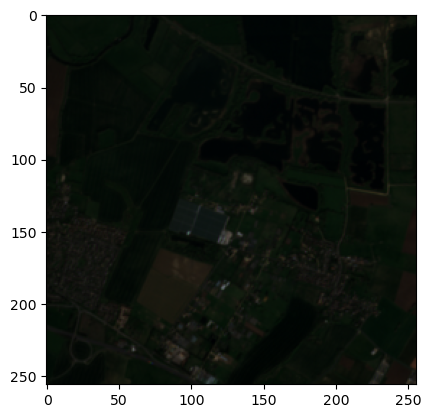

In [37]:
print_tensor(input_train[0])

torch.Size([256, 256])
tensor([[ 0.1660, -0.1299,  0.1133,  ...,  0.2543,  0.1083, -0.2674],
        [ 0.1956, -0.0390,  0.4913,  ...,  0.5148,  0.1910, -0.1889],
        [-0.0194, -0.1010,  0.0950,  ...,  0.1534,  0.2745, -0.2839],
        ...,
        [ 0.3154,  0.3952, -0.2775,  ..., -0.1519,  0.1161, -0.1041],
        [-0.0455,  0.4297,  0.4116,  ..., -0.6645, -0.1691, -0.0846],
        [ 0.2811,  0.0870,  0.4655,  ...,  0.1660,  0.3056,  0.1730]],
       grad_fn=<SelectBackward0>)


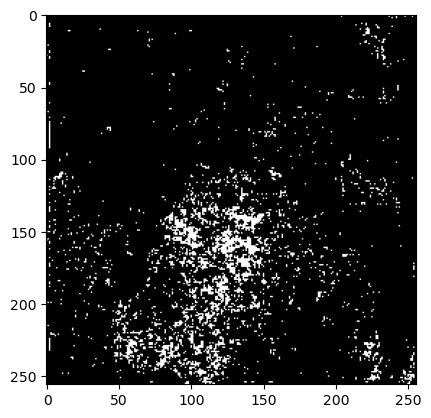

In [35]:
temp = input_train[0]
y_pred = model(input_train)
print(y_pred[0][0].shape)
print(y_pred[0][0])
x = y_pred[0][0]
mask = torch.where(x > 0.5, torch.ones_like(x), torch.zeros_like(x))
plt.imshow(mask.detach().numpy(),cmap='gray')

# Edge Detection Example

In [ ]:
import kornia as K

torch.Size([1, 12, 256, 256])
torch.Size([1, 12, 256, 256])
torch.Size([256, 256])


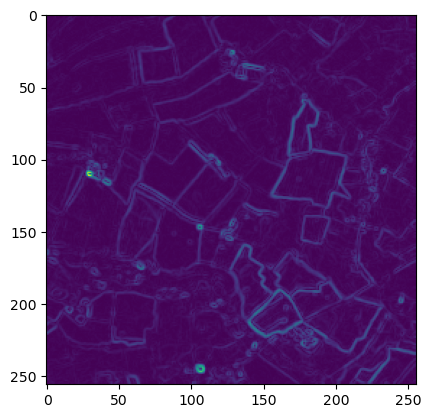

In [51]:
print(train_features.size())
x_sobel: torch.Tensor = K.filters.sobel(train_features)
print(x_sobel.size())

img_temp = x_sobel[0].transpose(0,2)[:,:,1]
print(img_temp.size())
plt.imshow(img_temp)